# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [3]:
# Load the dataset
employee_data = pd.read_csv("Employee_data.csv")

In [4]:
# Check the first few entries
employee_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [5]:
# Inspect the shape of the dataset
employee_data.shape

(74610, 24)

In [6]:
# Inspect the different columns in the dataset
employee_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [7]:
# Check the summary of the dataset
employee_data.describe(include='all')

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74610.000000,74610.000000,74610,74610.000000,74610,74610.000000,74610,74610,74610,74610.000000,...,74610.000000,74610,74610,72197.000000,74610,74610,74610,74610,74610,74610
unique,NaN,NaN,2,NaN,5,NaN,4,4,4,NaN,...,NaN,3,3,NaN,2,2,2,4,4,2
top,NaN,NaN,Male,NaN,Technology,NaN,Good,High,Average,NaN,...,NaN,Entry,Medium,NaN,No,No,No,Good,Low,Stayed
freq,NaN,NaN,40898,NaN,19350,NaN,28196,37306,44786,NaN,...,NaN,29820,37281,NaN,60390,70952,62486,37241,29654,39191
mean,37246.028696,38.529379,NaN,15.722638,NaN,7344.931417,NaN,NaN,NaN,0.832958,...,1.657432,NaN,NaN,55.711899,NaN,NaN,NaN,NaN,NaN,NaN
std,21505.785344,12.082299,NaN,11.224059,NaN,2596.373589,NaN,NaN,NaN,0.995326,...,1.579862,NaN,NaN,25.392325,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,18.000000,NaN,1.000000,NaN,1226.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,18624.250000,28.000000,NaN,7.000000,NaN,5652.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,37239.500000,39.000000,NaN,13.000000,NaN,7348.500000,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55871.750000,49.000000,NaN,23.000000,NaN,8876.000000,NaN,NaN,NaN,2.000000,...,3.000000,NaN,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN


### **1.3 Check the data type of columns**

In [8]:
# Check the info to see the types of the feature variables and the null values present
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [9]:
# Check the number of missing values in each column
print(employee_data.isnull().sum())

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [10]:
# Check the percentage of missing values in each column
(employee_data.isnull().sum() / len(employee_data)) * 100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [11]:
# Handle the missing value rows in the column
original_length = len(employee_data)
employee_data = employee_data.dropna(subset=["Distance from Home", "Company Tenure (In Months)"])

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [12]:
# Check the percentage of remaining data after missing values are removed
new_length = len(employee_data)
remaining_percent = (new_length / original_length) * 100
print(f"Remaining data after dropping rows with missing values: {remaining_percent:.2f}%")

Remaining data after dropping rows with missing values: 94.67%


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [13]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def check_redundant_values(df):
    for col in df.columns:
        unique_vals = df[col].unique()
        total_vals = len(df[col])
        unique_count = len(unique_vals)
        print(f"\nColumn: {col}")
        print(f"Unique values: {unique_vals}")
        if unique_count < total_vals:
            redundant = total_vals - unique_count
            print(f"Redundant values: {redundant}")
        else:
            print("No redundant values")

In [14]:
# Check the data
check_redundant_values(employee_data)


Column: Employee ID
Unique values: [ 8410 64756 30257 ... 12409  9554 73042]
Redundant values: 77

Column: Age
Unique values: [31 59 24 36 56 38 47 48 57 40 34 28 22 30 25 29 19 42 53 21 45 26 32 55
 27 23 50 49 58 43 18 52 46 39 51 35 37 33 44 20 41 54]
Redundant values: 70593

Column: Gender
Unique values: ['Male' 'Female']
Redundant values: 70633

Column: Years at Company
Unique values: [19  4 10  7 41  3 23 16 44 13  1 31  8  5 39 12 14 15  2 17 21  9 11 24
  6 48 34 29 27 30 40 18 35 20 33 32 36 42 38 26 43 22 37 28 45 25 46 47
 49 50 51]
Redundant values: 70584

Column: Job Role
Unique values: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Redundant values: 70630

Column: Monthly Income
Unique values: [ 5390  5534  8159 ... 11558 12651 11586]
Redundant values: 60857

Column: Work-Life Balance
Unique values: ['Excellent' 'Poor' 'Good' 'Fair']
Redundant values: 70631

Column: Job Satisfaction
Unique values: ['Medium' 'High' 'Very High' 'Low']
Redundant values: 70631

Co

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [15]:
# Drop redundant columns which are not required for modelling
employee_data = employee_data.drop_duplicates(subset='Employee ID', keep='first')

# Print result
print(f"Duplicate Employee IDs removed. Remaining rows: {len(employee_data)}")

Duplicate Employee IDs removed. Remaining rows: 70558


In [16]:
# Check first few rows of data
employee_data.head(8)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47.0,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93.0,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88.0,No,No,No,Excellent,Low,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [17]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [18]:
# Put all the feature variables in X
X = employee_data.drop(['Attrition', 'Employee ID'], axis=1)
# Put the target variable in y
y=employee_data['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [19]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [20]:
#The below will be used later
y_train1 = y_train

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [21]:
# Select numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64'])
print("Numerical columns:")
print(numerical_cols.columns)

Numerical columns:
Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

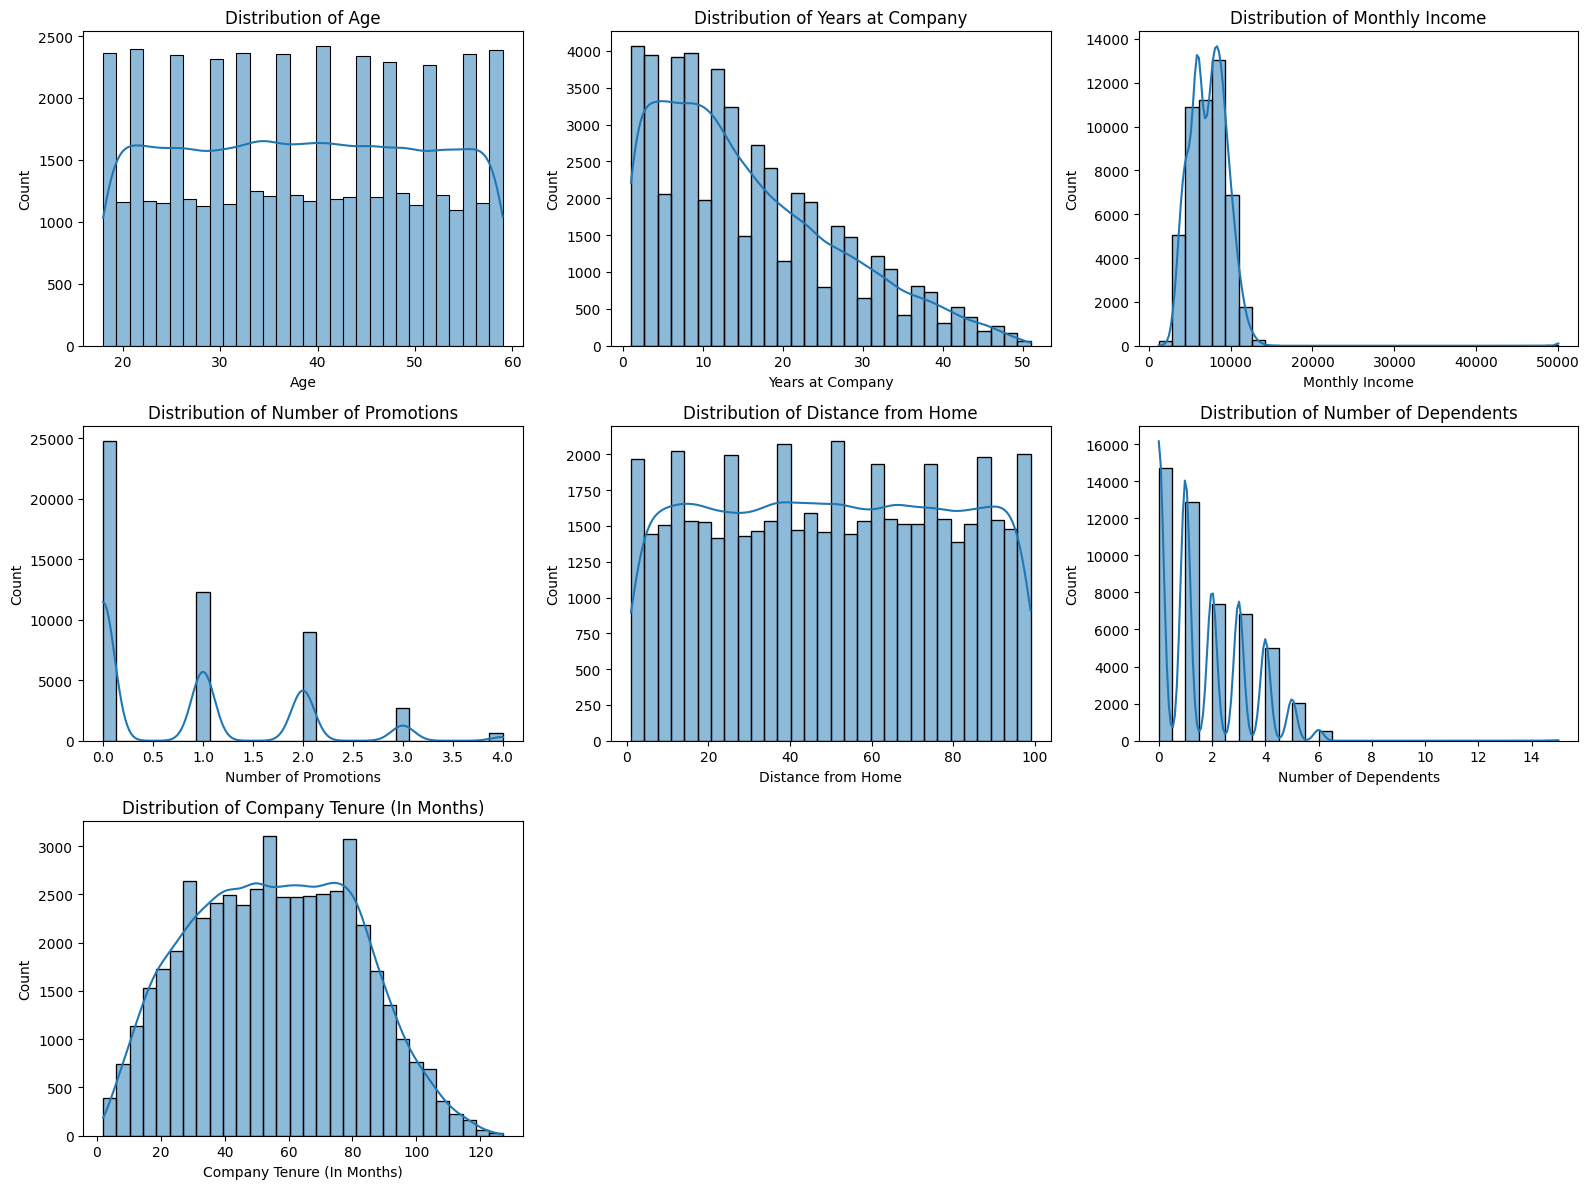

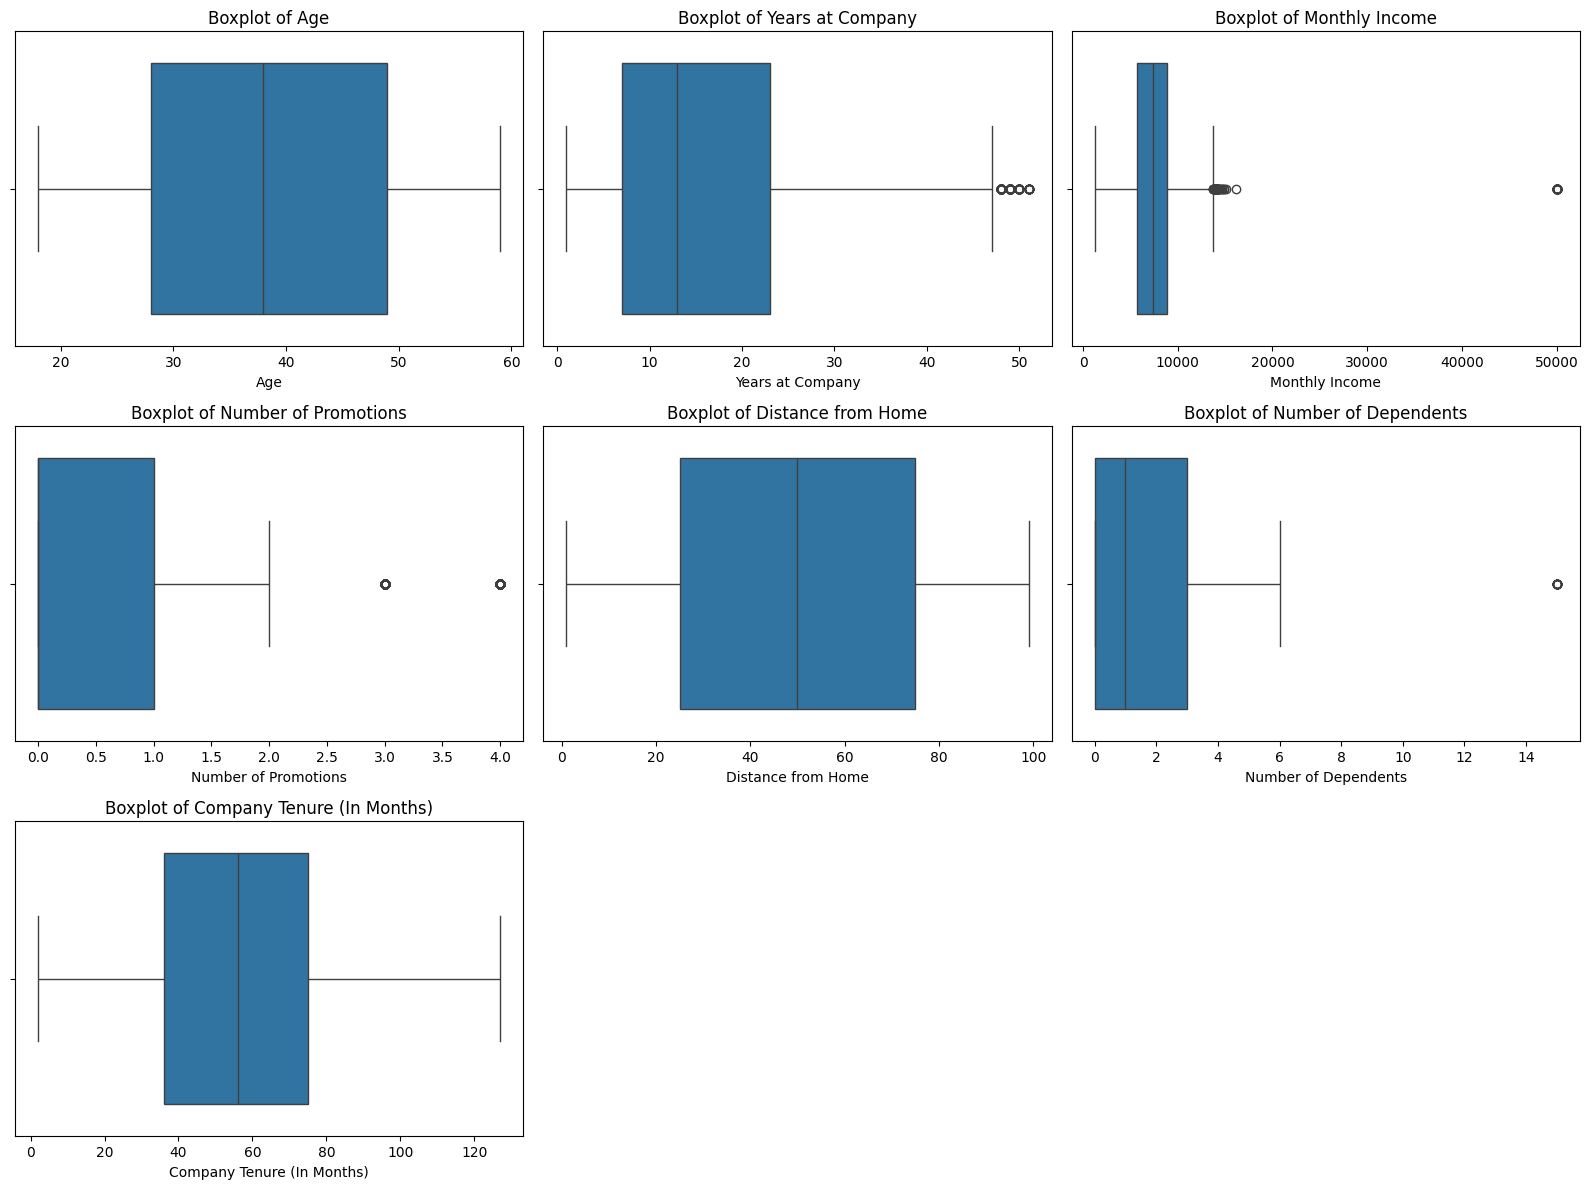

In [22]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_cols.columns, 1):
    plt.subplot((len(numerical_cols.columns) + 2) // 3, 3, i)
    sns.histplot(numerical_cols[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

# Plot boxplots for each numerical column
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_cols.columns, 1):
    plt.subplot((len(numerical_cols.columns) + 2) // 3, 3, i)
    sns.boxplot(x=numerical_cols[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

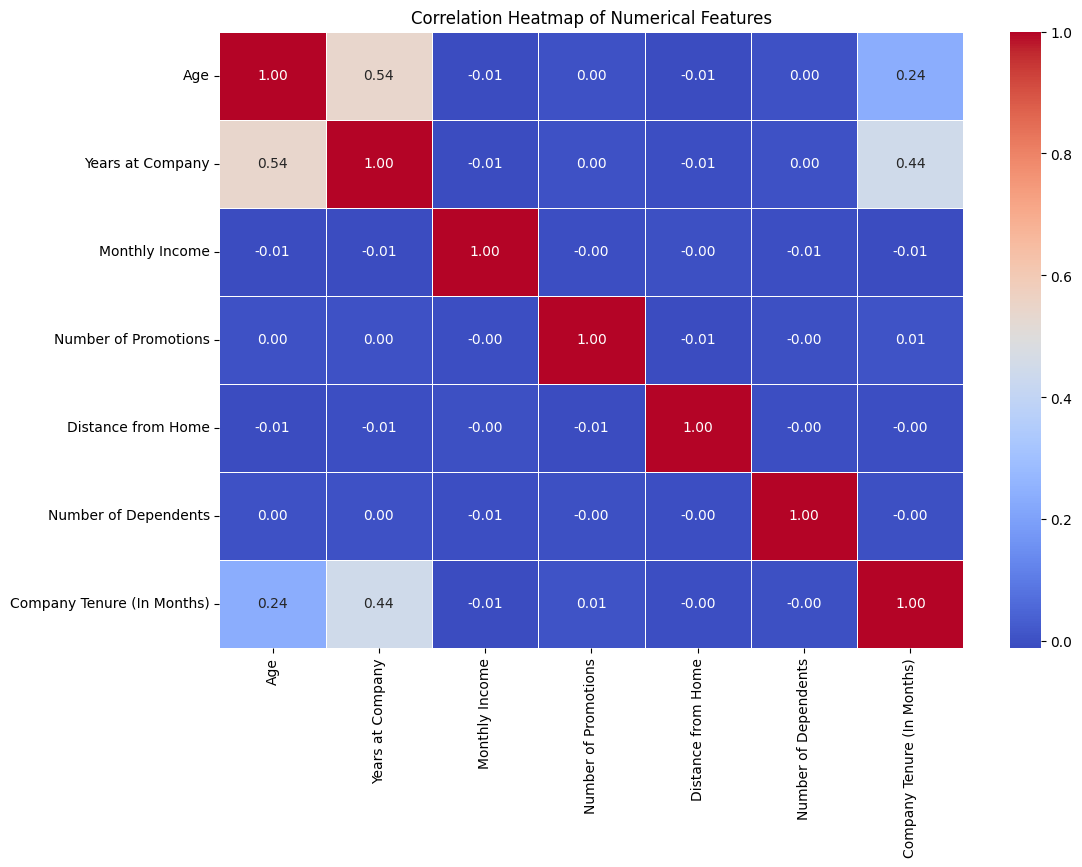

In [23]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix
corr_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

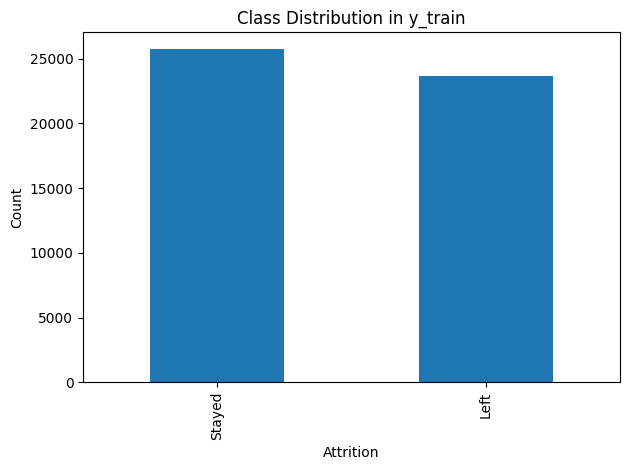

Attrition
Stayed    25745
Left      23645
Name: count, dtype: int64

In [24]:
# Plot a bar chart to check class balance
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution in y_train')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
y_train.value_counts()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

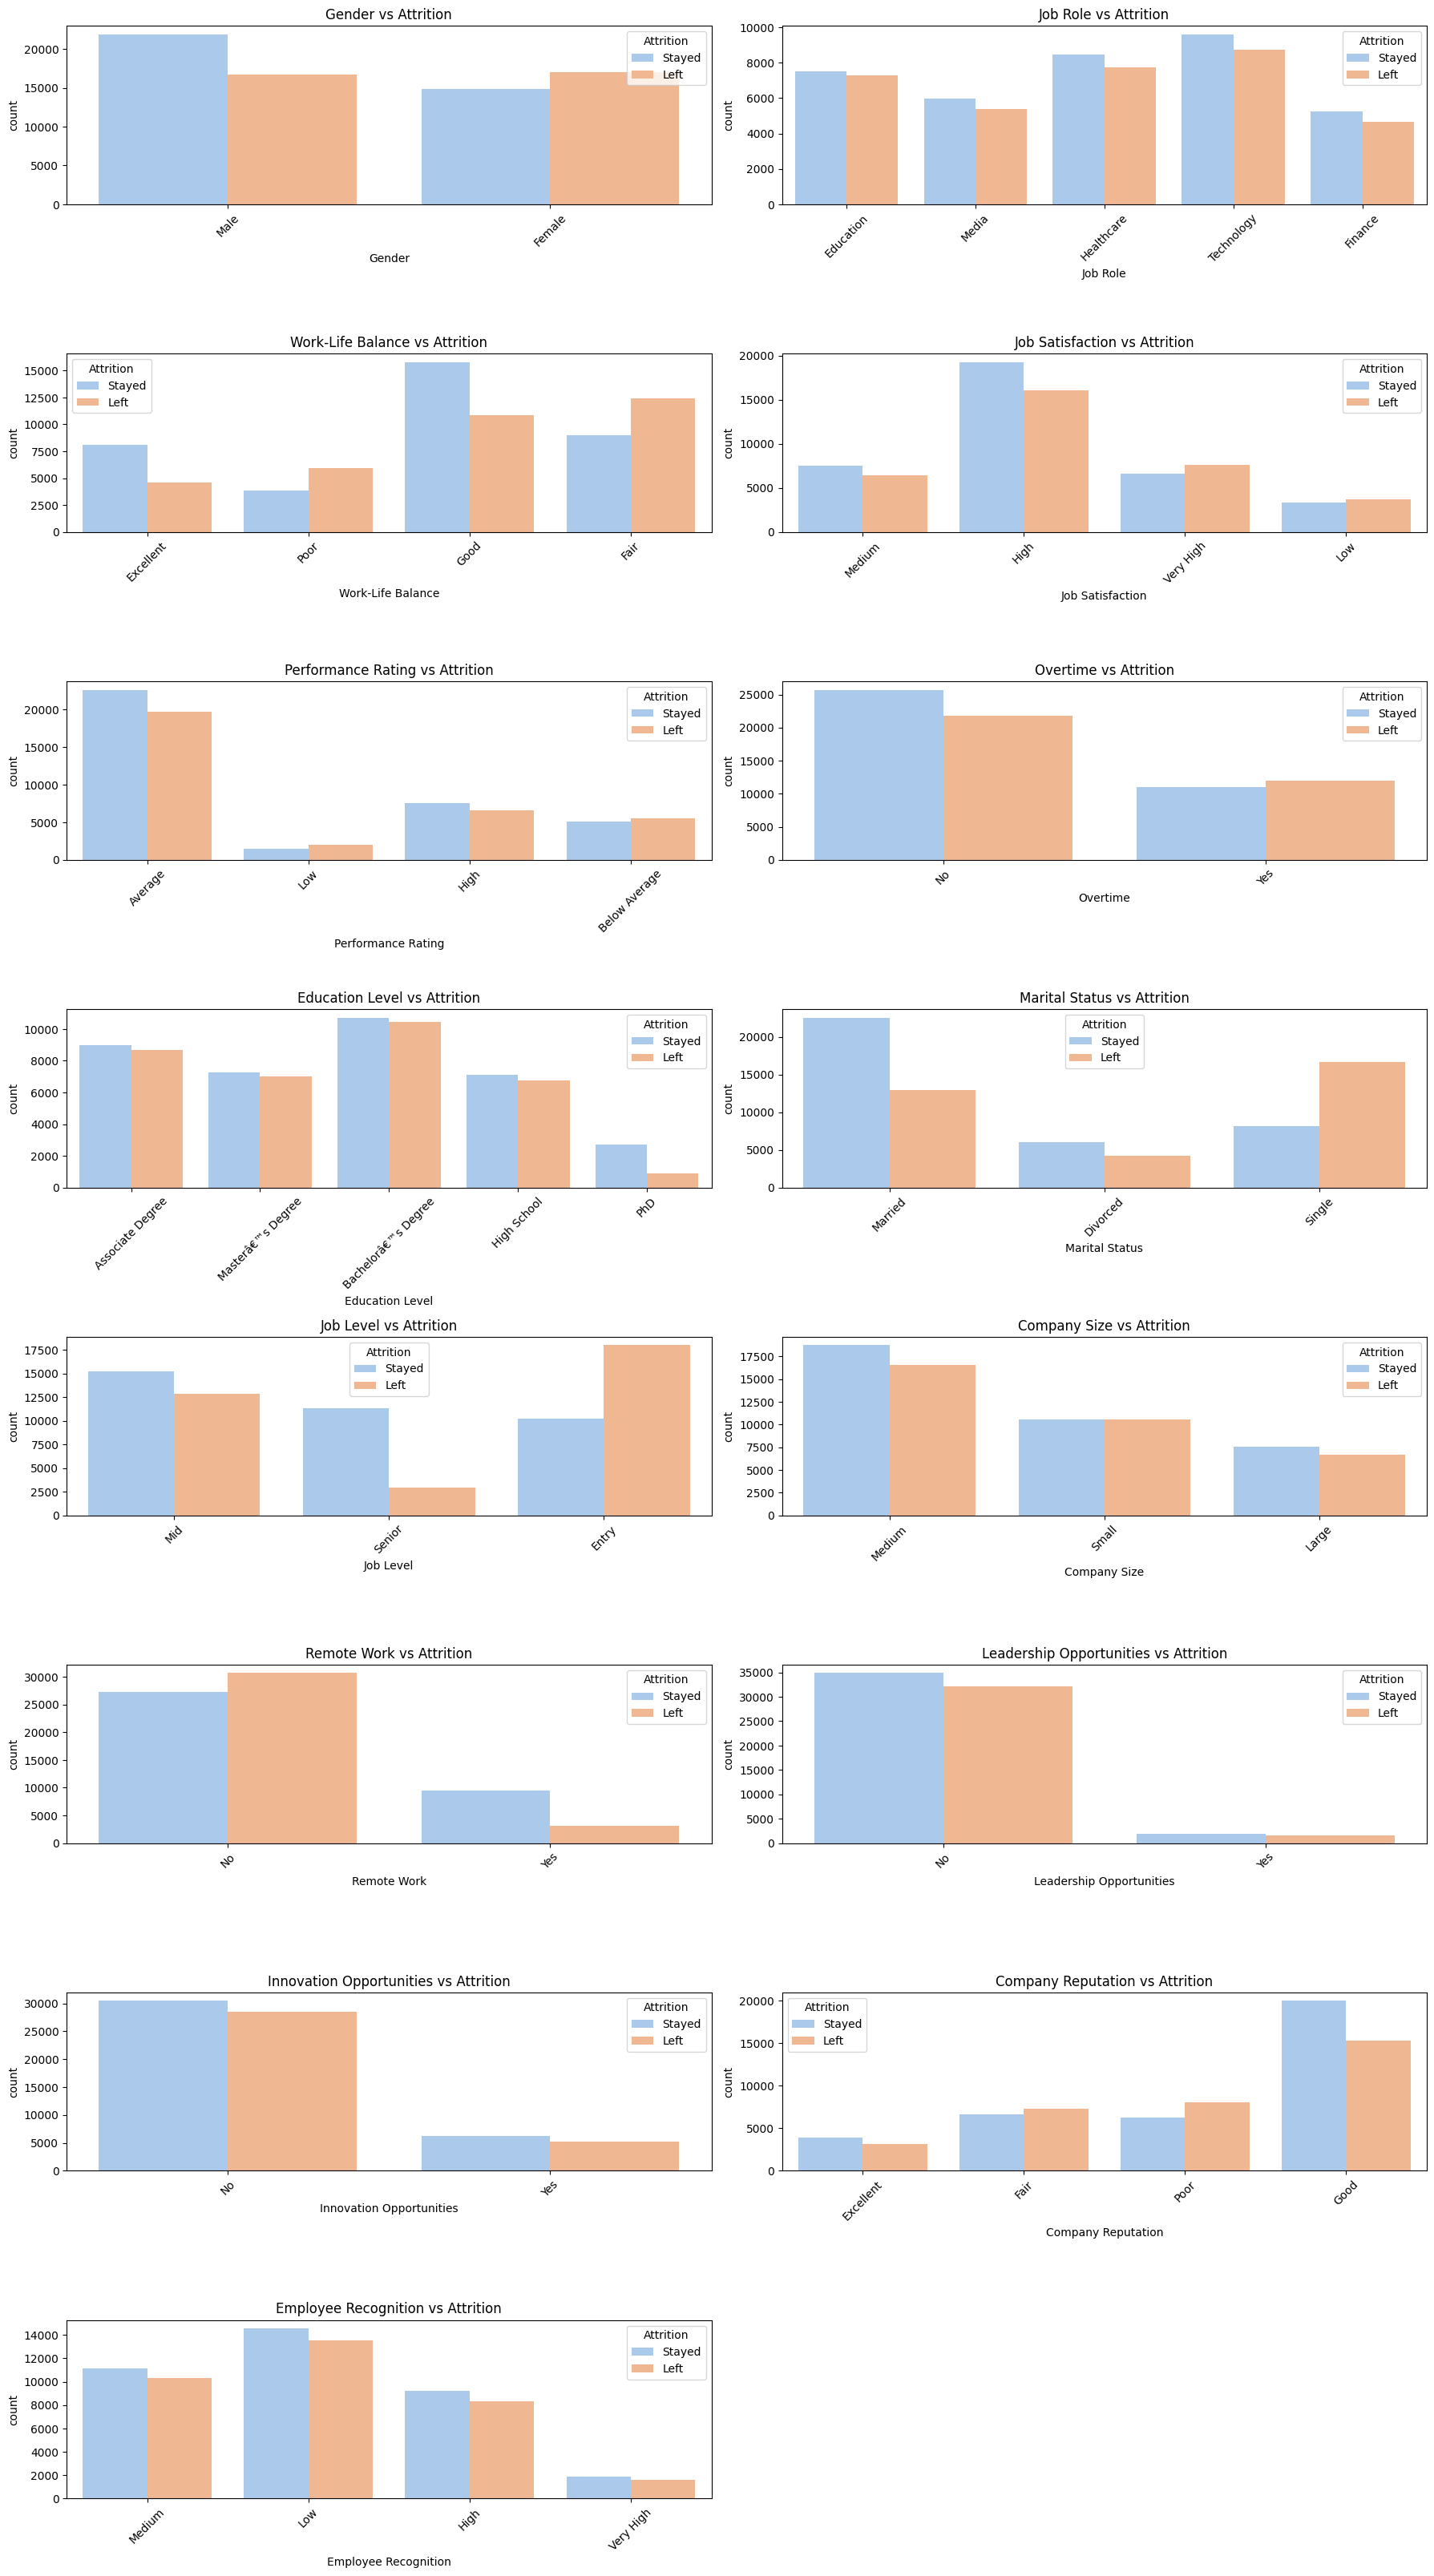

In [25]:
categorical_cols = employee_data.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Attrition']

plt.figure(figsize=(18, len(categorical_cols) * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, i)
    sns.countplot(x=col, hue='Attrition', data=employee_data, palette='pastel')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [26]:
# Select numerical columns
numerical_cols1=X_test.select_dtypes(include=['int64', 'float64'])
numerical_cols1.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

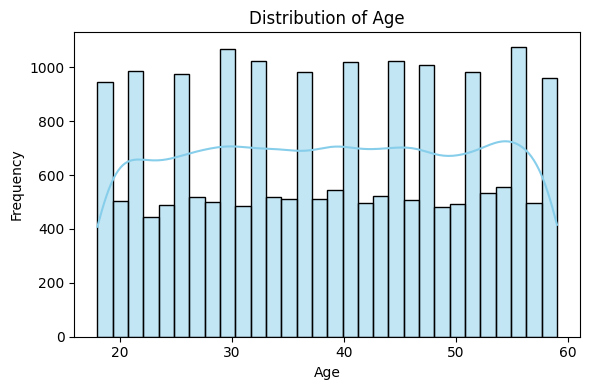

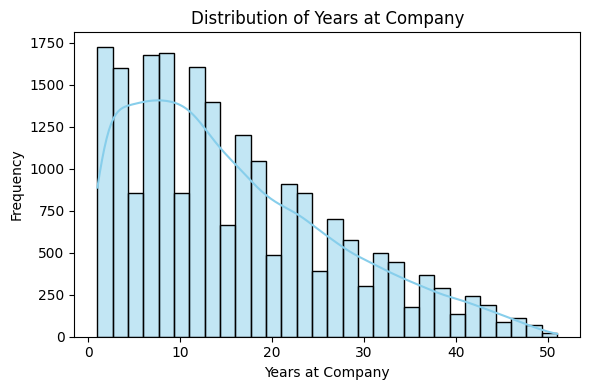

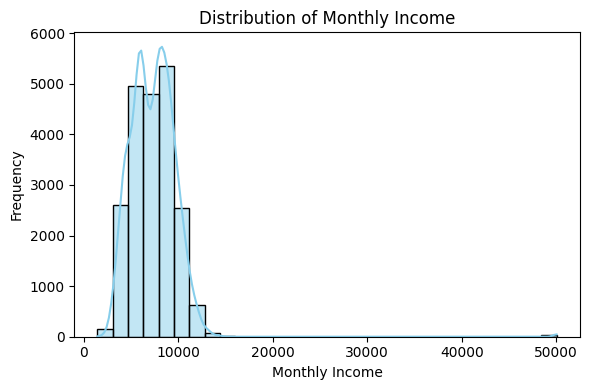

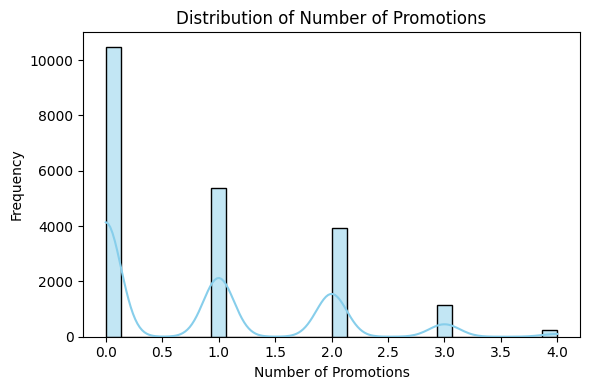

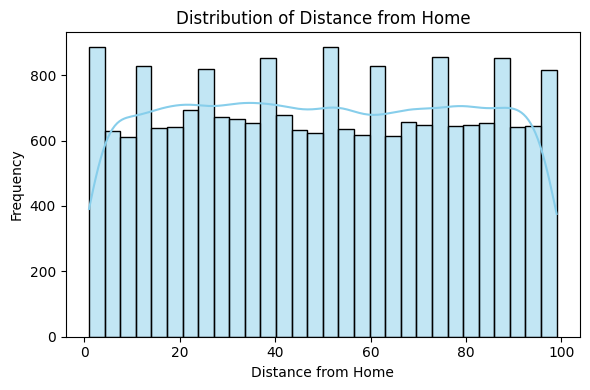

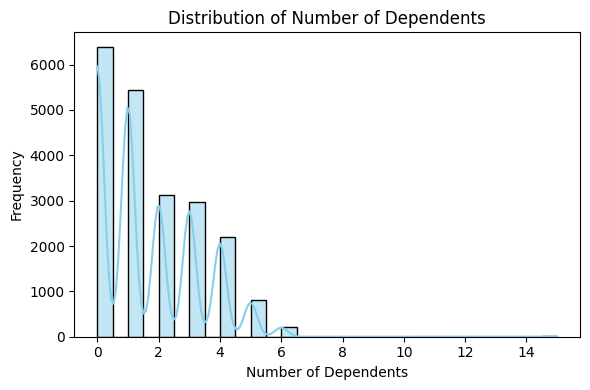

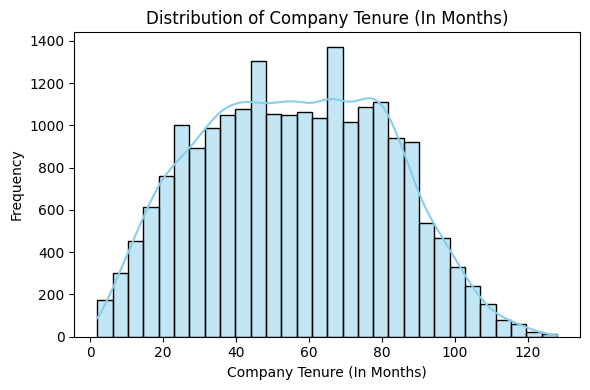

In [27]:
# Plot all the numerical columns to understand their distribution
for col in numerical_cols1.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_test[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

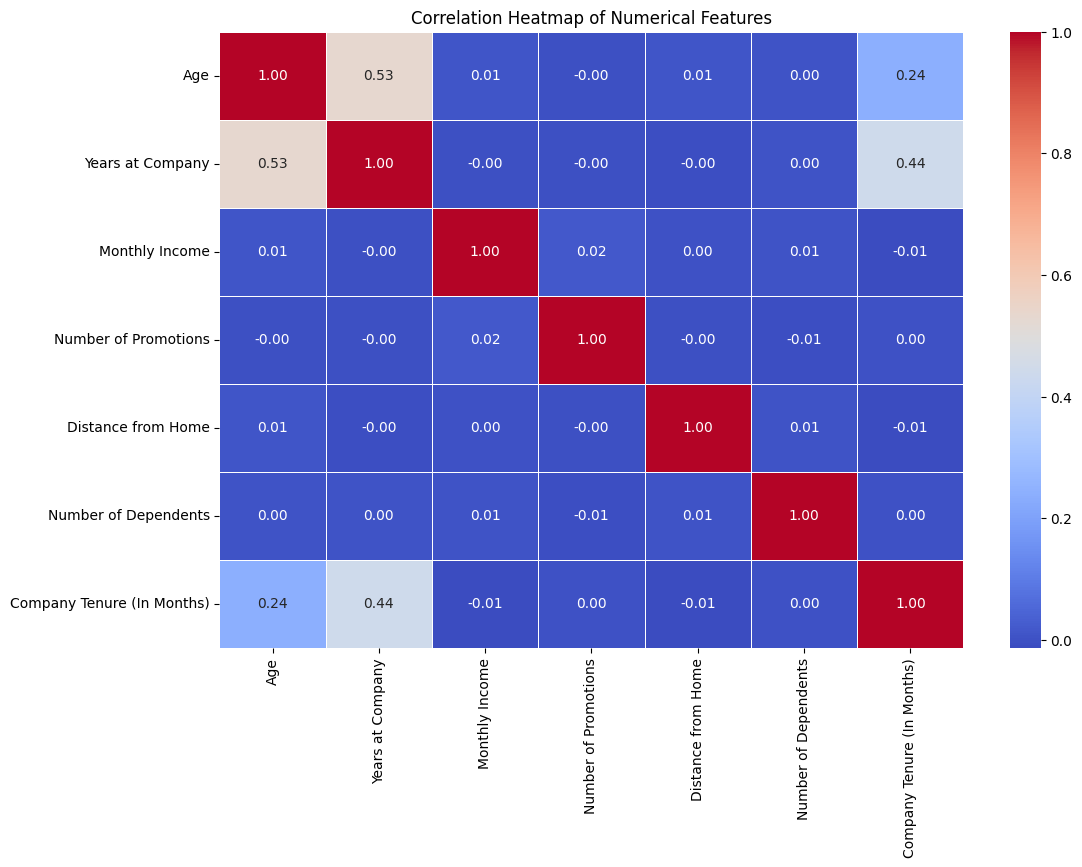

In [28]:
# Create correlation matrix for numerical columns
# Plot Heatmap of the correlation matrix
corr_matrix1 = numerical_cols1.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

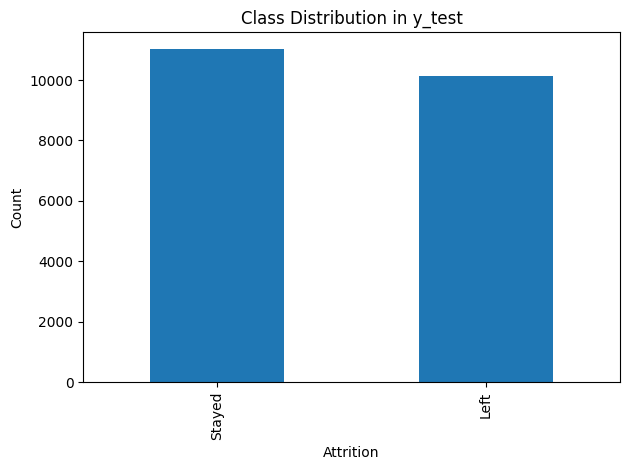

Attrition
Stayed    25745
Left      23645
Name: count, dtype: int64

In [29]:
# Plot a bar chart to check class balance
# Plot a bar chart to check class balance
y_test.value_counts().plot(kind='bar')
plt.title('Class Distribution in y_test')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
y_train.value_counts()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

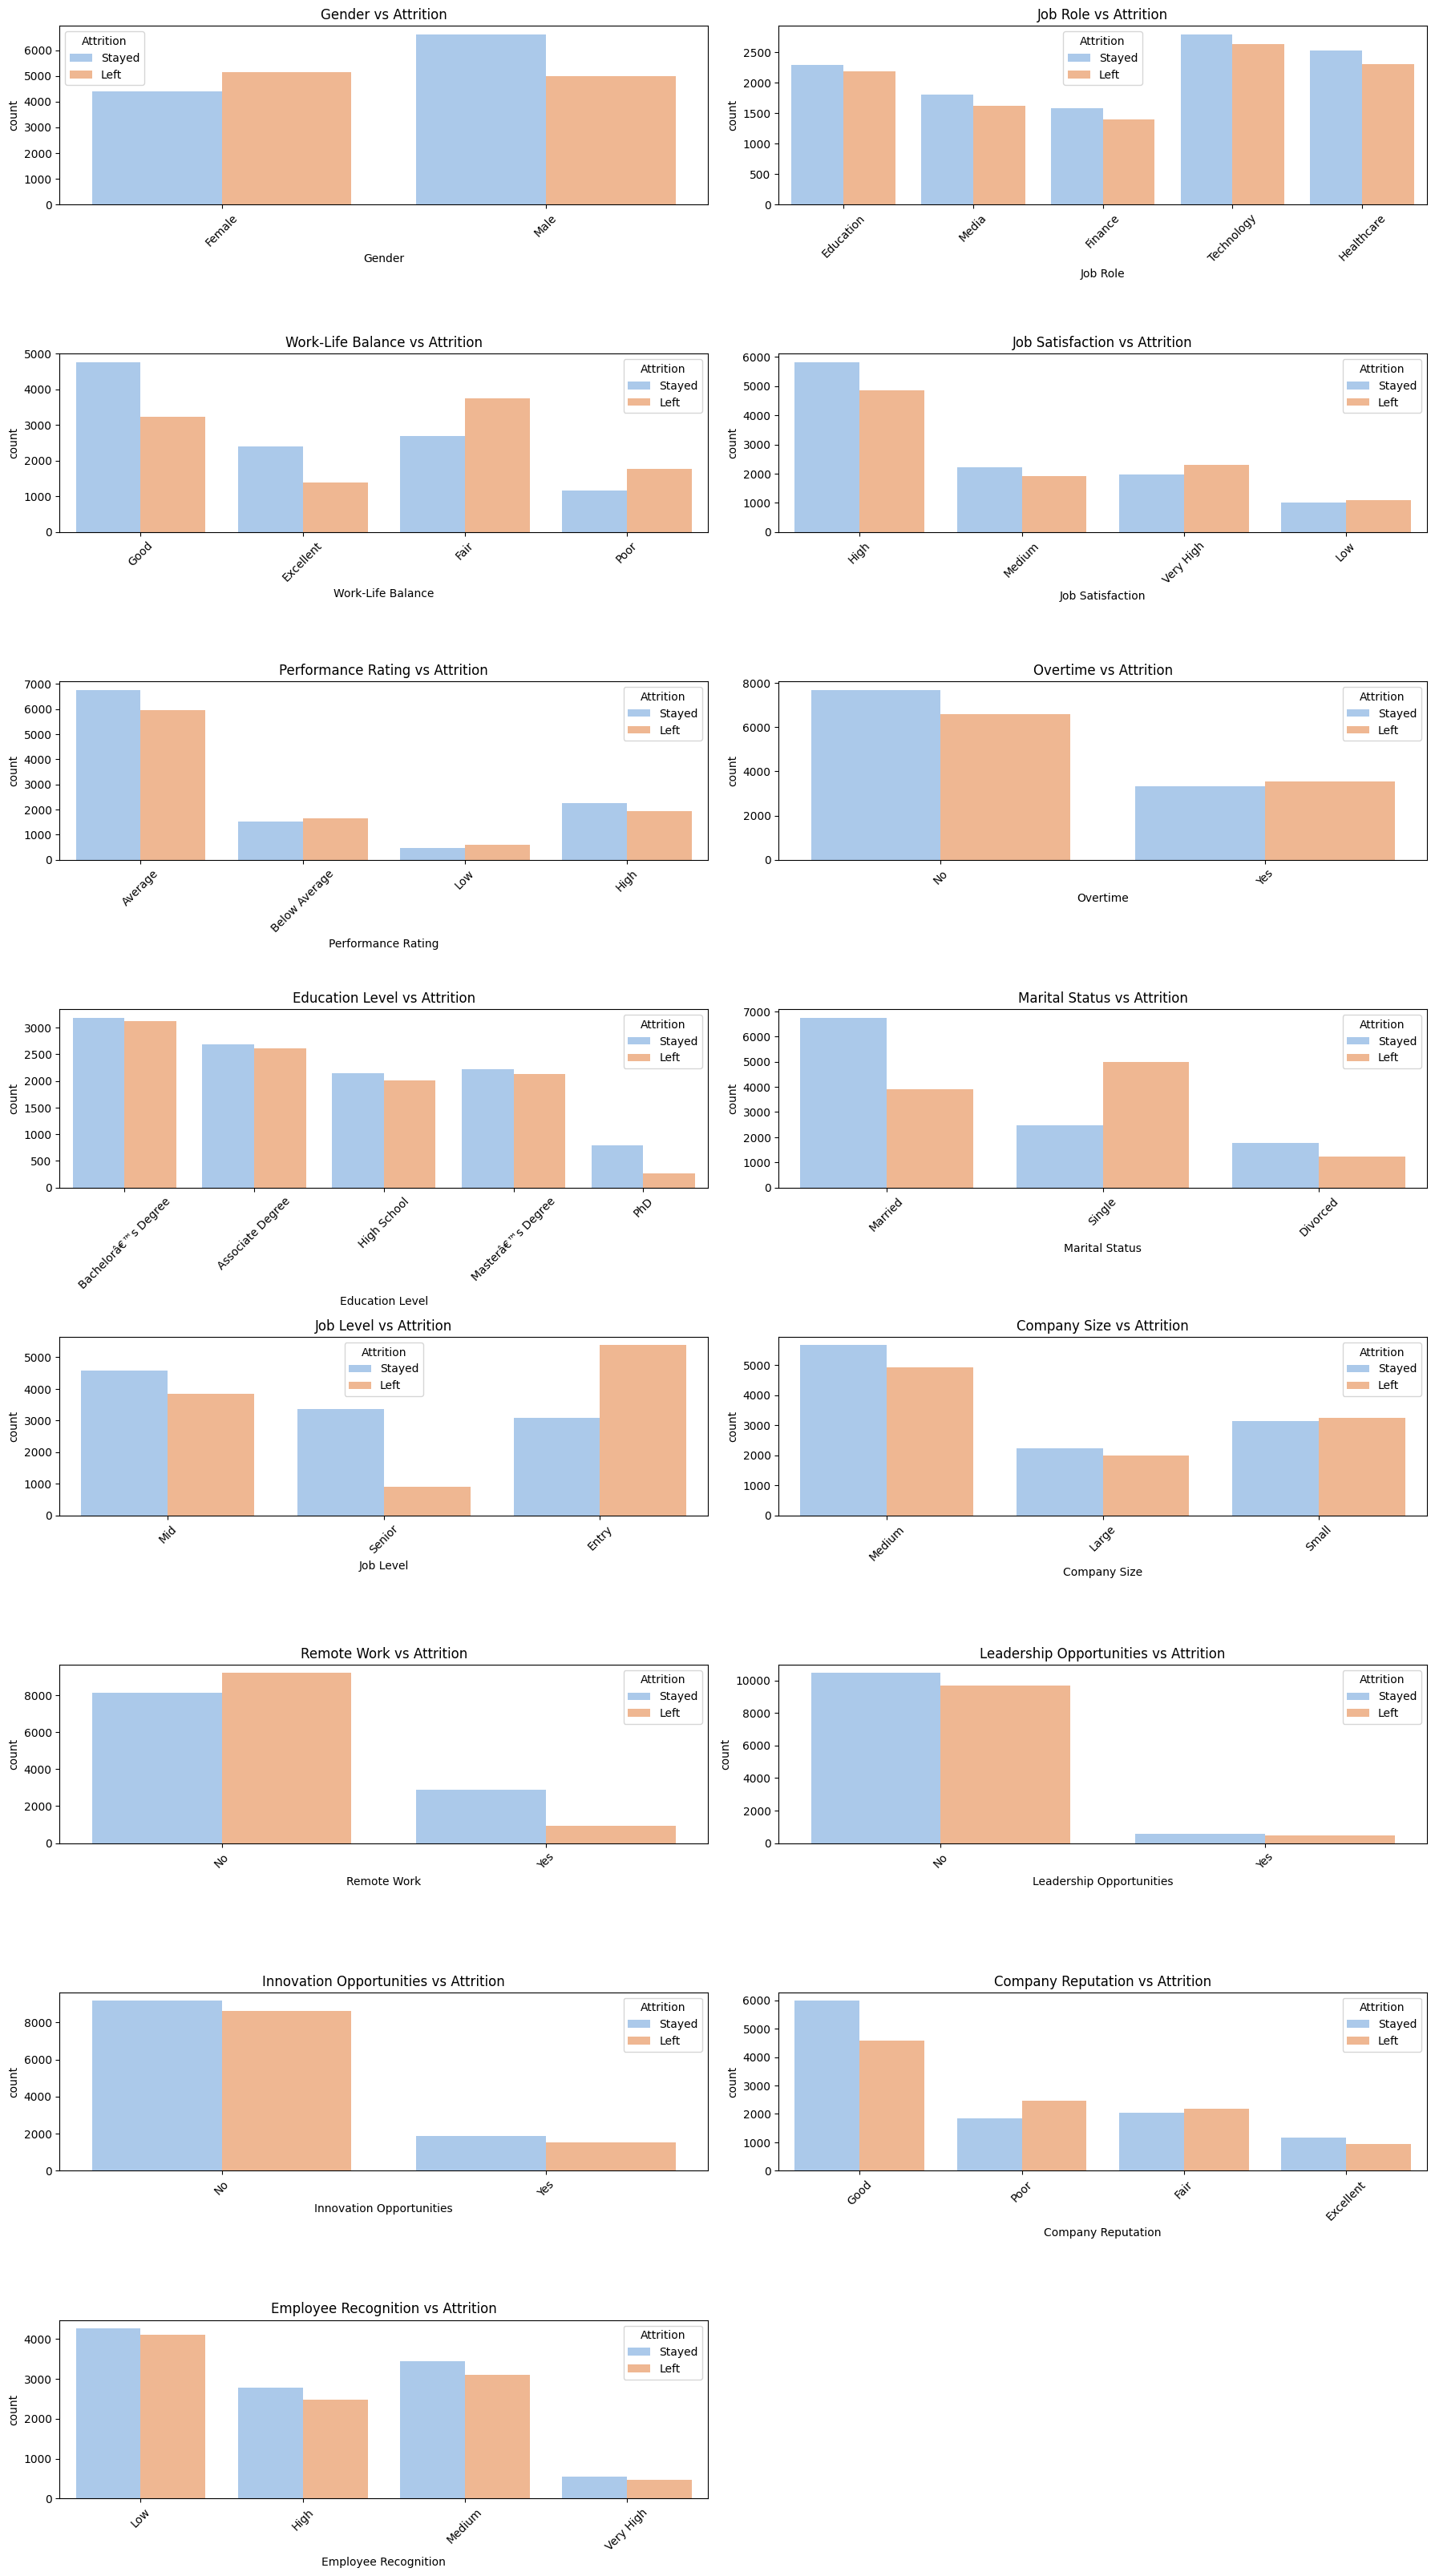

In [30]:
# Plot distribution for each categorical column with target variable
X_test_plot = X_test.copy()
X_test_plot['Attrition'] = y_test.values

# Re-identify categorical columns (only if some exist before encoding)
categorical_cols = employee_data.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Attrition']

plt.figure(figsize=(18, len(categorical_cols) * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, i)
    sns.countplot(x=col, hue='Attrition', data=employee_data.loc[X_test_plot.index], palette='pastel')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [31]:
# Check the categorical columns
categorical_cols = employee_data.select_dtypes(include=['object', 'category']).columns
categorical_cols_train = X_train.select_dtypes(include='object').columns
categorical_cols_test = X_test.select_dtypes(include='object').columns

print("Categorical Columns:")
print(categorical_cols.tolist())

Categorical Columns:
['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [32]:
# Create dummy variables using the 'get_dummies' for independent columns
dummies = pd.get_dummies(employee_data[categorical_cols], drop_first=True).astype(int)
dummies_train = pd.get_dummies(X_train[categorical_cols_train], drop_first=True).astype(int)

# Add the results to the master DataFrame
employee_data = pd.concat([employee_data, dummies], axis=1)
X_train = pd.concat([X_train, dummies_train], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [33]:
# Drop categorical column and check the DataFrame
employee_data.drop(columns=categorical_cols, inplace=True)
X_train.drop(columns=categorical_cols_train, inplace=True)
X_train.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
43251,37,6,7903,3,47.0,0,19.0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
8228,29,17,7070,0,59.0,0,20.0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
57123,25,2,7653,0,62.0,0,24.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
55882,32,23,6171,2,66.0,1,40.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
14223,41,13,9479,0,10.0,1,55.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [34]:
# Create dummy variables using the 'get_dummies' for independent columns
dummies_test = pd.get_dummies(X_test[categorical_cols_test], drop_first=True).astype(int)
dummies_train, dummies_test = dummies_train.align(dummies_test, join='left', axis=1, fill_value=0)

# Add the results to the master DataFrame
X_test = pd.concat([X_test, dummies_test], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [35]:
# Drop categorical column and check the DataFrame
X_test.drop(columns=categorical_cols_test, inplace=True)
X_test.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
48013,55,12,2890,2,74.0,1,66.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
57182,47,28,5723,0,51.0,2,39.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
34902,51,5,6540,1,22.0,1,12.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
13783,32,4,11056,0,7.0,3,24.0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
32776,27,2,8653,2,98.0,1,19.0,1,0,1,...,1,0,0,0,0,1,0,0,0,0


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [36]:
# Convert y_train and y_validation to DataFrame
y_train = pd.DataFrame(y_train, columns=['Attrition'])
y_test = pd.DataFrame(y_test, columns=['Attrition'])

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [37]:
# Create dummy variables using the 'get_dummies' for dependent column
dummies_train1 = pd.get_dummies(y_train, drop_first=True).astype(int)

# Now, add the dummy variable back to the y_train DataFrame
y_train = pd.concat([y_train, dummies_train1], axis=1)

# Check the DataFrame
y_train

,Attrition,Attrition_Stayed
43251,Stayed,1
8228,Stayed,1
57123,Stayed,1
55882,Stayed,1
14223,Stayed,1
...,...,...
15937,Left,0
66958,Stayed,1
69203,Stayed,1
59485,Stayed,1


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [38]:
# Create dummy variables using the 'get_dummies' for dependent column
dummies_test1 = pd.get_dummies(y_test, drop_first=True).astype(int)

# Now, add the dummy variable back to the y_train DataFrame
y_test = pd.concat([y_test, dummies_test1], axis=1)

# Check the DataFrame
y_test

,Attrition,Attrition_Stayed
48013,Stayed,1
57182,Stayed,1
34902,Stayed,1
13783,Left,0
32776,Left,0
...,...,...
42753,Left,0
3928,Left,0
5865,Left,0
45208,Left,0


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [39]:
# Drop redundant columns from both train and validation
y_train = y_train.drop('Attrition', axis=1)
y_test = y_test.drop('Attrition', axis=1)

# Check the resulting dataframes
print(y_train.head())
print(y_test.head())

       Attrition_Stayed
43251                 1
8228                  1
57123                 1
55882                 1
14223                 1
       Attrition_Stayed
48013                 1
57182                 1
34902                 1
13783                 0
32776                 0


In [40]:
#Renaming the columns from Attrition_Stayed to Attrition
y_train.columns=['Attrition']
y_test.columns=['Attrition']

print(y_train.head())
print(y_test.head())

       Attrition
43251          1
8228           1
57123          1
55882          1
14223          1
       Attrition
48013          1
57182          1
34902          1
13783          0
32776          0


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [41]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [42]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# Scale the numeric features present in the training set
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()
# Scale the numerical features present in the validation set
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
48013,1.365375,-0.328444,-1.772610,1.171620,0.840320,-0.416375,0.409343,0,0,0,...,0,0,0,0,0,1,0,1,0,0
57182,0.704224,1.096464,-0.645938,-0.832964,0.033883,0.217303,-0.653621,1,0,0,...,0,0,0,0,0,1,0,0,0,0
34902,1.034800,-0.951842,-0.321021,0.169328,-0.982928,-0.416375,-1.716585,1,1,0,...,0,0,0,0,0,1,0,0,0,0
13783,-0.535433,-1.040898,1.474972,-0.832964,-1.508864,0.850982,-1.244156,1,0,0,...,1,0,0,0,0,0,1,1,0,0
32776,-0.948652,-1.219012,0.519310,1.171620,1.681818,-0.416375,-1.441001,1,0,1,...,1,0,0,0,0,1,0,0,0,0


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [43]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [44]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE

rfe = RFE(estimator=logreg, n_features_to_select=15)          
rfe = rfe.fit(X_train, y_train)

In [45]:
# Display the features selected by RFE
print("Selected Features by RFE:")
print(X_train.columns[rfe.support_])

Selected Features by RFE:
Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')


In [46]:
feature_ranks = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
feature_ranks

[('Age', False, 17),
 ('Years at Company', False, 7),
 ('Monthly Income', False, 25),
 ('Number of Promotions', False, 5),
 ('Distance from Home', False, 3),
 ('Number of Dependents', False, 6),
 ('Company Tenure (In Months)', False, 27),
 ('Gender_Male', True, 1),
 ('Job Role_Finance', False, 13),
 ('Job Role_Healthcare', False, 15),
 ('Job Role_Media', False, 14),
 ('Job Role_Technology', False, 12),
 ('Work-Life Balance_Fair', True, 1),
 ('Work-Life Balance_Good', False, 2),
 ('Work-Life Balance_Poor', True, 1),
 ('Job Satisfaction_Low', True, 1),
 ('Job Satisfaction_Medium', False, 26),
 ('Job Satisfaction_Very High', True, 1),
 ('Performance Rating_Below Average', True, 1),
 ('Performance Rating_High', False, 24),
 ('Performance Rating_Low', True, 1),
 ('Overtime_Yes', True, 1),
 ('Education Level_Bachelorâ€™s Degree', False, 22),
 ('Education Level_High School', False, 19),
 ('Education Level_Masterâ€™s Degree', False, 23),
 ('Education Level_PhD', True, 1),
 ('Marital Status_Mar

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [47]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_].tolist()

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [48]:
# Select only the columns selected by RFE
X_train_rfe = X_train[col]
X_test_rfe=X_test[col]

In [49]:
# View the training data
X_train_rfe.head()

,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
43251,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0
8228,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
57123,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0
55882,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
14223,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [50]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_rfe)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [51]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                49390
Model:                            GLM   Df Residuals:                    49374
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24995.
Date:                Tue, 22 Apr 2025   Deviance:                       49989.
Time:                        19:59:47   Pearson chi2:                 4.63e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3109
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2457      0.028      8.650      0.000       0.190       0.301
Gender_Male                          0.5748      0.022     25.859      0.000       0.531       0.618
Work-Life Balance_Fair              -1.0739      0.025    -42.534      0.000      -1.123      -1.024
Work-Life Balance_Poor              -1.2343      0.034    -36.682      0.000      -1.300      -1.168
Job Satisfaction_Low                -0.5066      0.037    -13.613      0.000      -0.580      -0.434
Job Satisfaction_Very High          -0.4597      0.028    -16.588      0.000      -0.514      -0.405
Performance Rating_Below Average    -0.3214      0.031    -10.423      0.000      -0.382      -0.261
Performance Rating_Low              -0.5852      0.051    -11.377      0.000      -0.686      -0.484
Overtime_Yes                        -0.3564      0.023    -15.191      0.000      -0.402      -0.310
Education Level_PhD                  1.5159      0.055     27.420      0.000       1.408       1.624
Marital Status_Single               -1.6957      0.025    -68.857      0.000      -1.744      -1.647
Job Level_Mid                        0.9667      0.024     39.920      0.000       0.919       1.014
Job Level_Senior                     2.5340      0.035     73.163      0.000       2.466       2.602
Remote Work_Yes                      1.7068      0.032     53.025      0.000       1.644       1.770
Company Reputation_Fair             -0.5312      0.029    -18.617      0.000      -0.587      -0.475
Company Reputation_Poor             -0.7357      0.029    -25.808      0.000      -0.792      -0.680
====================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [52]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif["feature"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
# Round the VIF values to 2 decimal places and sort by VIF in descending order
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

# Display the sorted VIF data
vif

,feature,VIF
0,Gender_Male,1.83
10,Job Level_Mid,1.65
9,Marital Status_Single,1.42
1,Work-Life Balance_Fair,1.41
7,Overtime_Yes,1.39
11,Job Level_Senior,1.32
14,Company Reputation_Poor,1.26
13,Company Reputation_Fair,1.25
4,Job Satisfaction_Very High,1.23
2,Work-Life Balance_Poor,1.19


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [54]:
# Predict the probabilities on the training set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

43251    0.560348
8228     0.778345
57123    0.867202
55882    0.679774
14223    0.472362
11317    0.981208
45351    0.561118
19981    0.037891
44656    0.309029
43557    0.694345
dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [55]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.56034811, 0.7783453 , 0.86720219, 0.6797745 , 0.47236242,
       0.98120806, 0.5611182 , 0.03789138, 0.30902877, 0.69434513])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [56]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
prediction = pd.DataFrame({'Actual':y_train1.values,'stayed_Prob':y_train_pred})
print(prediction.head())

   Actual  stayed_Prob
0  Stayed     0.560348
1  Stayed     0.778345
2  Stayed     0.867202
3  Stayed     0.679774
4  Stayed     0.472362


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [57]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
prediction['Predicted'] = (prediction['stayed_Prob'] >= 0.5).astype(int)
print(prediction.head())

   Actual  stayed_Prob  Predicted
0  Stayed     0.560348          1
1  Stayed     0.778345          1
2  Stayed     0.867202          1
3  Stayed     0.679774          1
4  Stayed     0.472362          0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [58]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(prediction['Actual'].map({'Stayed': 1, 'Left': 0}), prediction['Predicted'])
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7394


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [59]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

binary_actual = prediction['Actual'].map({'Stayed': 1, 'Left': 0})
confusion = confusion_matrix(binary_actual, prediction['Predicted'])
print(confusion)

[[17052  6593]
 [ 6278 19467]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [60]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = confusion.ravel()

print("True Negatives :", tn)
print("False Positives :", fp)
print("False Negatives :", fn)
print("True Positives :", tp)

True Negatives : 17052
False Positives : 6593
False Negatives : 6278
True Positives : 19467


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [61]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
round(sensitivity,4)

0.7561

In [62]:
# Calculate specificity
specificity = tn / (tn + fp)
round(specificity,4)

0.7212

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [63]:
# Calculate precision
precision = tp / (tp + fp)
round(precision,4)

0.747

In [64]:
# Calculate recall
recall = tp/(tp + fn)
round(recall,4)

0.7561

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [65]:
# Define ROC function
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(actual, prob):
    fpr, tpr, thresholds = roc_curve(actual, prob)
    auc_score = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return auc_score
y_train_binary = y_train1.map({'Stayed': 1, 'Left': 0})

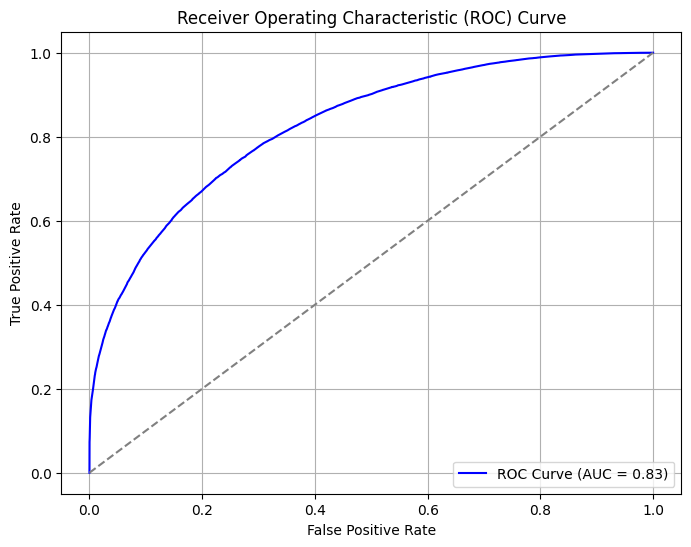

AUC Score: 0.8263


In [66]:
# Call the ROC function
auc = plot_roc(y_train_binary, y_train_pred)
print("AUC Score:", round(auc, 4))

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [67]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers=[float(x)/10 for x in range (10)]
for i in numbers:
    prediction[i]=prediction.stayed_Prob.map(lambda x: 1 if x > i else 0)
prediction.head()

,Actual,stayed_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,Stayed,0.560348,1,1,1,1,1,1,1,0,0,0,0
1,Stayed,0.778345,1,1,1,1,1,1,1,1,1,0,0
2,Stayed,0.867202,1,1,1,1,1,1,1,1,1,1,0
3,Stayed,0.679774,1,1,1,1,1,1,1,1,0,0,0
4,Stayed,0.472362,0,1,1,1,1,1,0,0,0,0,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [68]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_binary, prediction[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.521259  1.000000  0.000000
0.1   0.1  0.587184  0.994950  0.143202
0.2   0.2  0.660437  0.962206  0.331867
0.3   0.3  0.705467  0.910118  0.482639
0.4   0.4  0.731869  0.839775  0.614379
0.5   0.5  0.739401  0.756147  0.721167
0.6   0.6  0.729864  0.645290  0.821950
0.7   0.7  0.705588  0.527675  0.899302
0.8   0.8  0.659708  0.386755  0.956904
0.9   0.9  0.588662  0.218217  0.992007


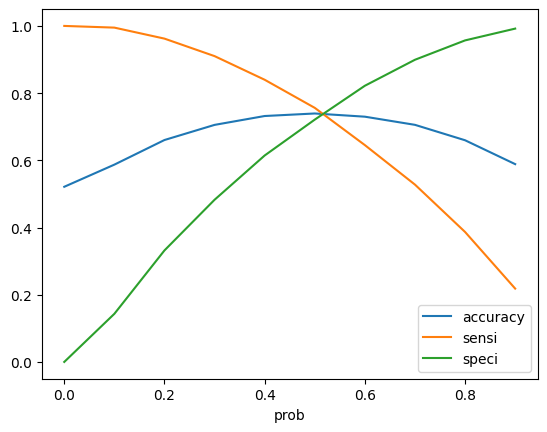

In [69]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [70]:
# Create a column for final prediction based on the optimal cutoff
prediction['final_predicted'] = [1 if x > 0.55 else 0 for x in y_train_pred]

prediction.head()

,Actual,stayed_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,Stayed,0.560348,1,1,1,1,1,1,1,0,0,0,0,1
1,Stayed,0.778345,1,1,1,1,1,1,1,1,1,0,0,1
2,Stayed,0.867202,1,1,1,1,1,1,1,1,1,1,0,1
3,Stayed,0.679774,1,1,1,1,1,1,1,1,0,0,0,1
4,Stayed,0.472362,0,1,1,1,1,1,0,0,0,0,0,0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [71]:
# Calculate the accuracy
accuracy2=metrics.accuracy_score(y_train_binary, prediction.final_predicted)
accuracy2

0.7366875885806844

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [72]:
# Create the confusion matrix once again
confusion1 = metrics.confusion_matrix(y_train_binary, prediction.final_predicted )
print(confusion1)

[[18240  5405]
 [ 7600 18145]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [73]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = confusion1.ravel()

print("True Negatives :", TN)
print("False Positives :", FP)
print("False Negatives :", FN)
print("True Positives :", TP)

True Negatives : 18240
False Positives : 5405
False Negatives : 7600
True Positives : 18145


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [74]:
# Calculate Sensitivity
Sensitivity1 = TP / float(TP+FN)
round(Sensitivity1,4)

0.7048

In [75]:
# Calculate Specificity
Specificity1=TN / float(TN+FP)
round(Specificity1,4)

0.7714

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [76]:
# Calculate Precision
precision = TP / (TP + FP)
round(precision,4)

0.7705

In [77]:
# Calculate Recall
recall = TP / (TP + FN)
round(recall,4)

0.7048

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [78]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [79]:
# Check actual and predicted values from initial model
y_train_binary, prediction.final_predicted

(43251    1
 8228     1
 57123    1
 55882    1
 14223    1
         ..
 15937    0
 66958    1
 69203    1
 59485    1
 40956    1
 Name: Attrition, Length: 49390, dtype: int64,
 0        1
 1        1
 2        1
 3        1
 4        0
         ..
 49385    0
 49386    1
 49387    1
 49388    1
 49389    1
 Name: final_predicted, Length: 49390, dtype: int64)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

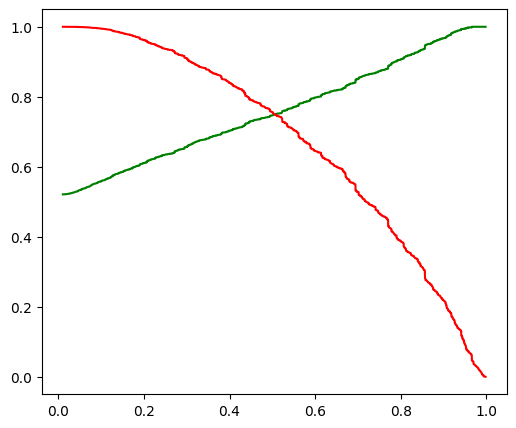

In [80]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_binary, prediction.stayed_Prob)
plt.figure(figsize=(6,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [81]:
# Select the relevant features for validation set
X_val_selected = X_test[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [82]:
# Add constant to X_validation
X_val_selected = sm.add_constant(X_val_selected)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [83]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_test_pred = res.predict(X_val_selected)
# View predictions
y_test_pred.head()

48013    0.770723
57182    0.522866
34902    0.812423
13783    0.073501
32776    0.588296
dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [84]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_test_pred, columns=['predicted_probability'])

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_test.values, columns=['Actual'])

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
actual.reset_index(drop=True, inplace=True)
predicted_probability.reset_index(drop=True, inplace=True)

y_test_pred_final = pd.concat([actual, predicted_probability], axis=1)

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [85]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_test_pred_final['final_prediction'] = y_test_pred_final['predicted_probability'].map(lambda x: 1 if x > 0.55 else 0)
# Check the DataFrame
y_test_pred_final.head()

,Actual,predicted_probability,final_prediction
0,1,0.770723,1
1,1,0.522866,0
2,1,0.812423,1
3,0,0.073501,0
4,0,0.588296,1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [86]:
# Calculate the overall accuracy
metrics.accuracy_score(y_test_pred_final.Actual, y_test_pred_final.final_prediction)

0.7354969765684052

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [87]:
# Create confusion matrix
confusion3 = metrics.confusion_matrix(y_test_pred_final.Actual, y_test_pred_final.final_prediction)
print(confusion3)

[[7829 2313]
 [3286 7740]]


In [88]:
# Create variables for true positive, true negative, false positive and false negative
TN1, FP1, FN1, TP1 = confusion3.ravel()

print("True Negatives :", TN1)
print("False Positives :", FP1)
print("False Negatives :", FN1)
print("True Positives :", TP1)

True Negatives : 7829
False Positives : 2313
False Negatives : 3286
True Positives : 7740


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [89]:
# Calculate sensitivity
sensitivity3= TP1 / (TP1+FN1)
round(sensitivity3,5)

0.70198

In [90]:
# Calculate specificity
specificity3= TN1 / (TN1+FP1)
round(specificity3,4)

0.7719

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [91]:
# Calculate precision
precision3 = TP1 / (TP1 + FP1)
round(precision3,4)

0.7699

In [92]:
# Calculate recall
recall3 = TP1 / (TP1 + FN1)
round(recall3,4)

0.702

## Conclusion



1. The classification model reached an accuracy of approximately 73.94% on the training dataset. According to the confusion matrix, it correctly identified 17,052 employees who stayed and 19,467 who left, while misclassifying 6,593 stayed as "left" and 6,278 left as "stayed".

2. An analysis of categorical features indicates that employee attrition is heavily influenced by factors such as overtime, poor work-life balance, low job satisfaction, limited recognition, lack of growth opportunities, and negative views of company reputation. Attributes like being single, working remotely, holding entry-level roles, or being part of a small-to-medium sized company also increase the likelihood of employees leaving.

3. The box plots reinforce insights from the histograms, clearly showing the distribution, spread, and central tendencies of the numerical variables. Notably, variables like years at company and monthly income are right-skewed, while promotions and number of dependents show concentration at lower values. Outliers are also present in several variables, signaling unique employee profiles.

4. A moderate correlation (0.44) exists between Years at Company and Company Tenure (in Months), which aligns with expectations since these measure similar constructs. Meanwhile, a slightly stronger correlation (0.54) between Age and Years at Company suggests that older employees tend to have longer tenures.

5. The ROC curve offers a visual of the model's performance across various probability thresholds, displaying the trade-off between the true positive rate and false positive rate. An AUC of 0.83 highlights the model’s strong ability to distinguish between employees who leave and those who stay.

6. Looking at the bar chart of the target variable, there is a fairly balanced representation between the two classes: 25,745 stayed and 23,645 left. This balance helps prevent model bias toward one class during training.

7. In terms of recall, the model shows a sensitivity of approximately 0.7561 (correctly identifying 76% of employees who left) and a specificity of about 0.7212 (correctly identifying 72% of those who stayed). This trade-off between the two metrics is a common dynamic in classification models.

8. The graph illustrating performance metrics across probability thresholds shows how accuracy, sensitivity, and specificity vary as the classification threshold changes. Typically, as sensitivity increases, specificity decreases, and vice versa, helping in choosing an optimal cutoff point.

9. The age distribution among mid-career professionals appears relatively uniform, while monthly income and years at the company are heavily skewed to the right, implying that more employees have shorter tenures and lower incomes.

10. Finally, the numerical features exhibit mostly weak linear correlations with one another, aside from the previously noted relationships. This suggests that many features might bring independent predictive power to the model, enhancing its ability to generalize.